# Credit Card Detection 

## Load relevant libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from imblearn.under_sampling import TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE
from collections import Counter




In [2]:
df = pd.read_csv('card_transdata.csv')
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [52]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

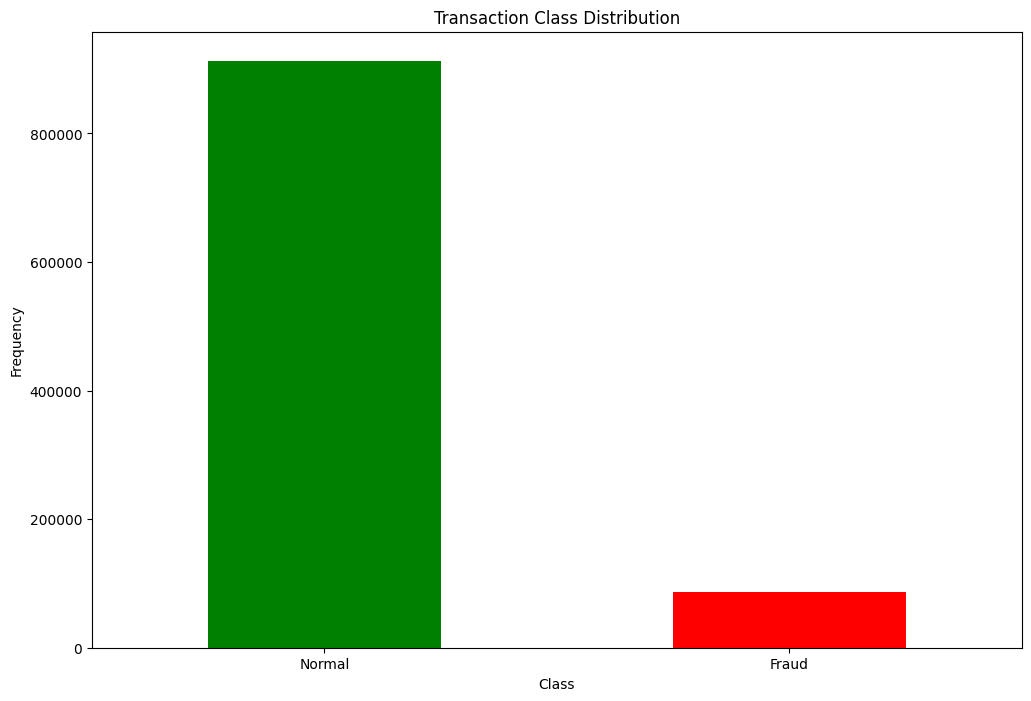

In [7]:
labels= ["Normal", "Fraud"]

plt.figure(figsize=(12,8))
count_classes = pd.value_counts(df['fraud'], sort=True)
count_classes.plot(kind='bar', rot=0, color=['green', 'red'])
plt.title("Transaction Class Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")


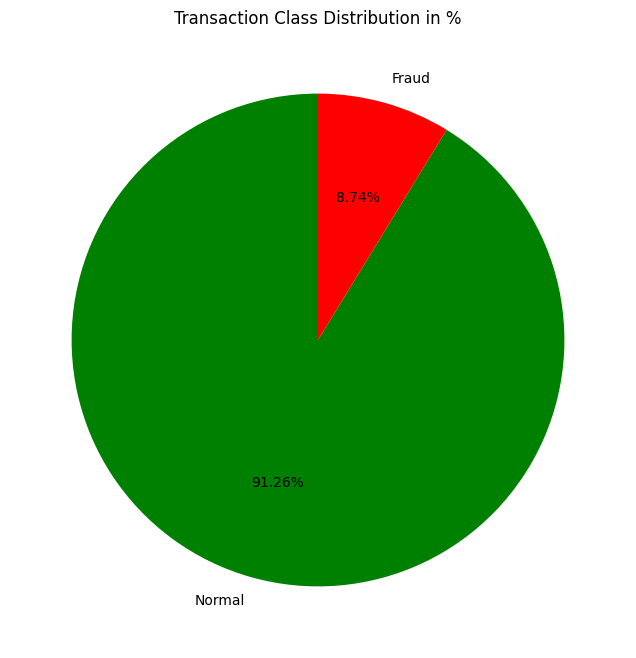

In [9]:
pie_values = [count_classes[0] / sum(count_classes) * 100, count_classes[1] / sum(count_classes) * 100]

plt.figure(figsize=(12,8))
plt.pie(pie_values, labels=['Normal', 'Fraud'],
        autopct = '%1.2f%%',
        startangle = 90,
        colors=['Green', 'Red'])
plt.title('Transaction Class Distribution in %')
plt.show()

## Check distribution for each features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

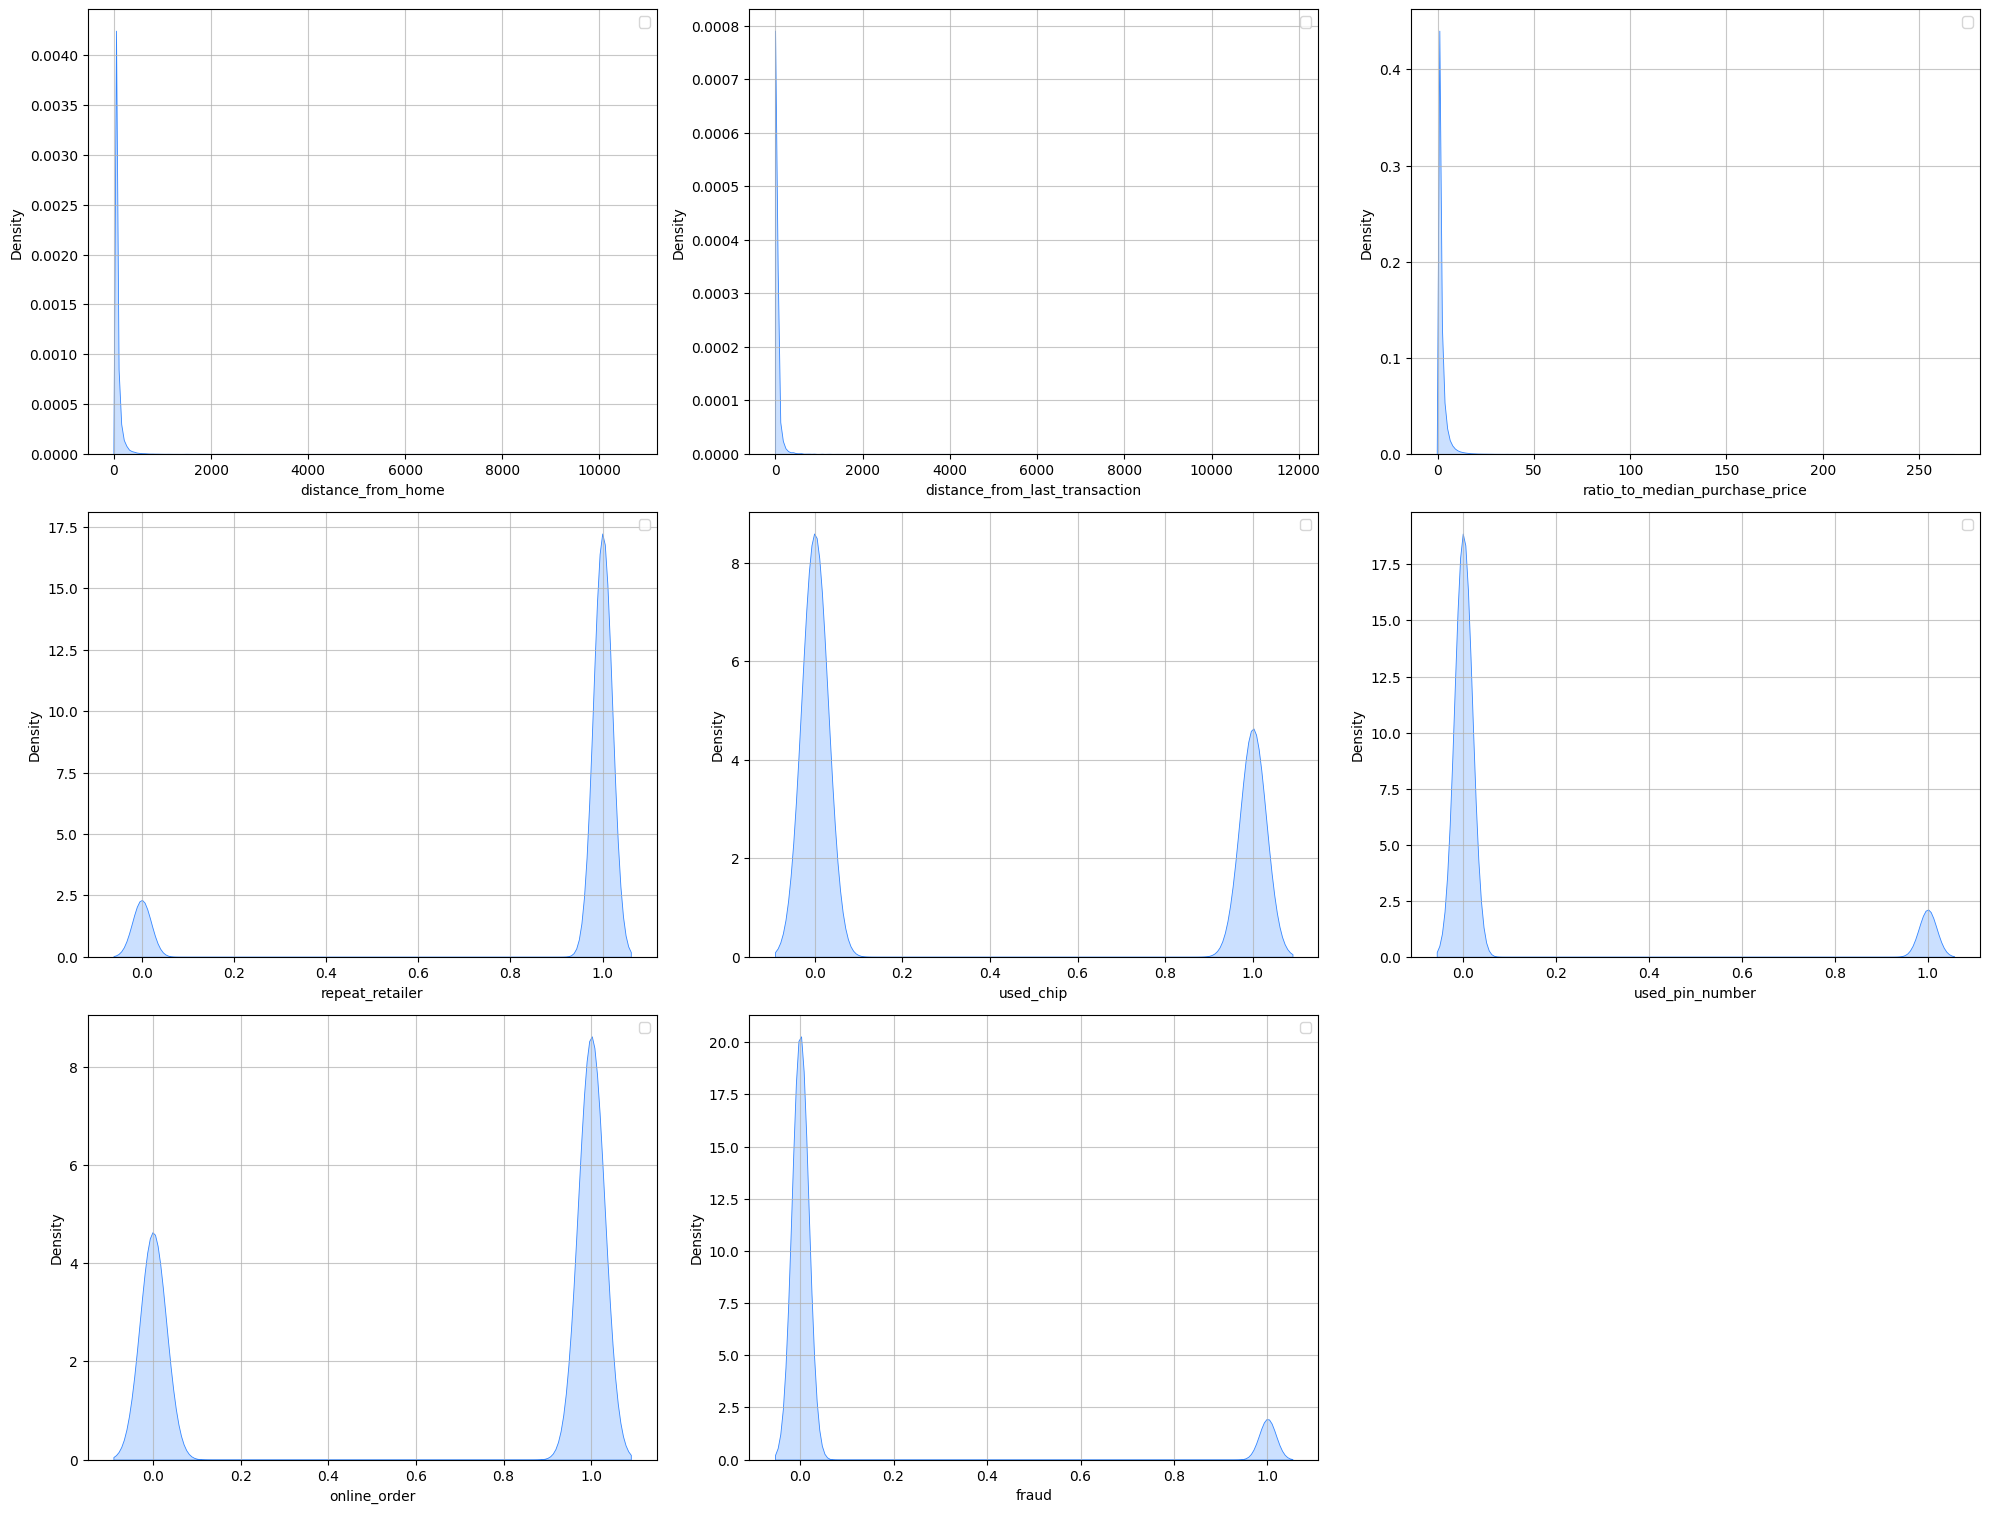

In [11]:
columns = (list(df.loc[:, 'distance_from_home':'fraud']))


fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df,) 
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

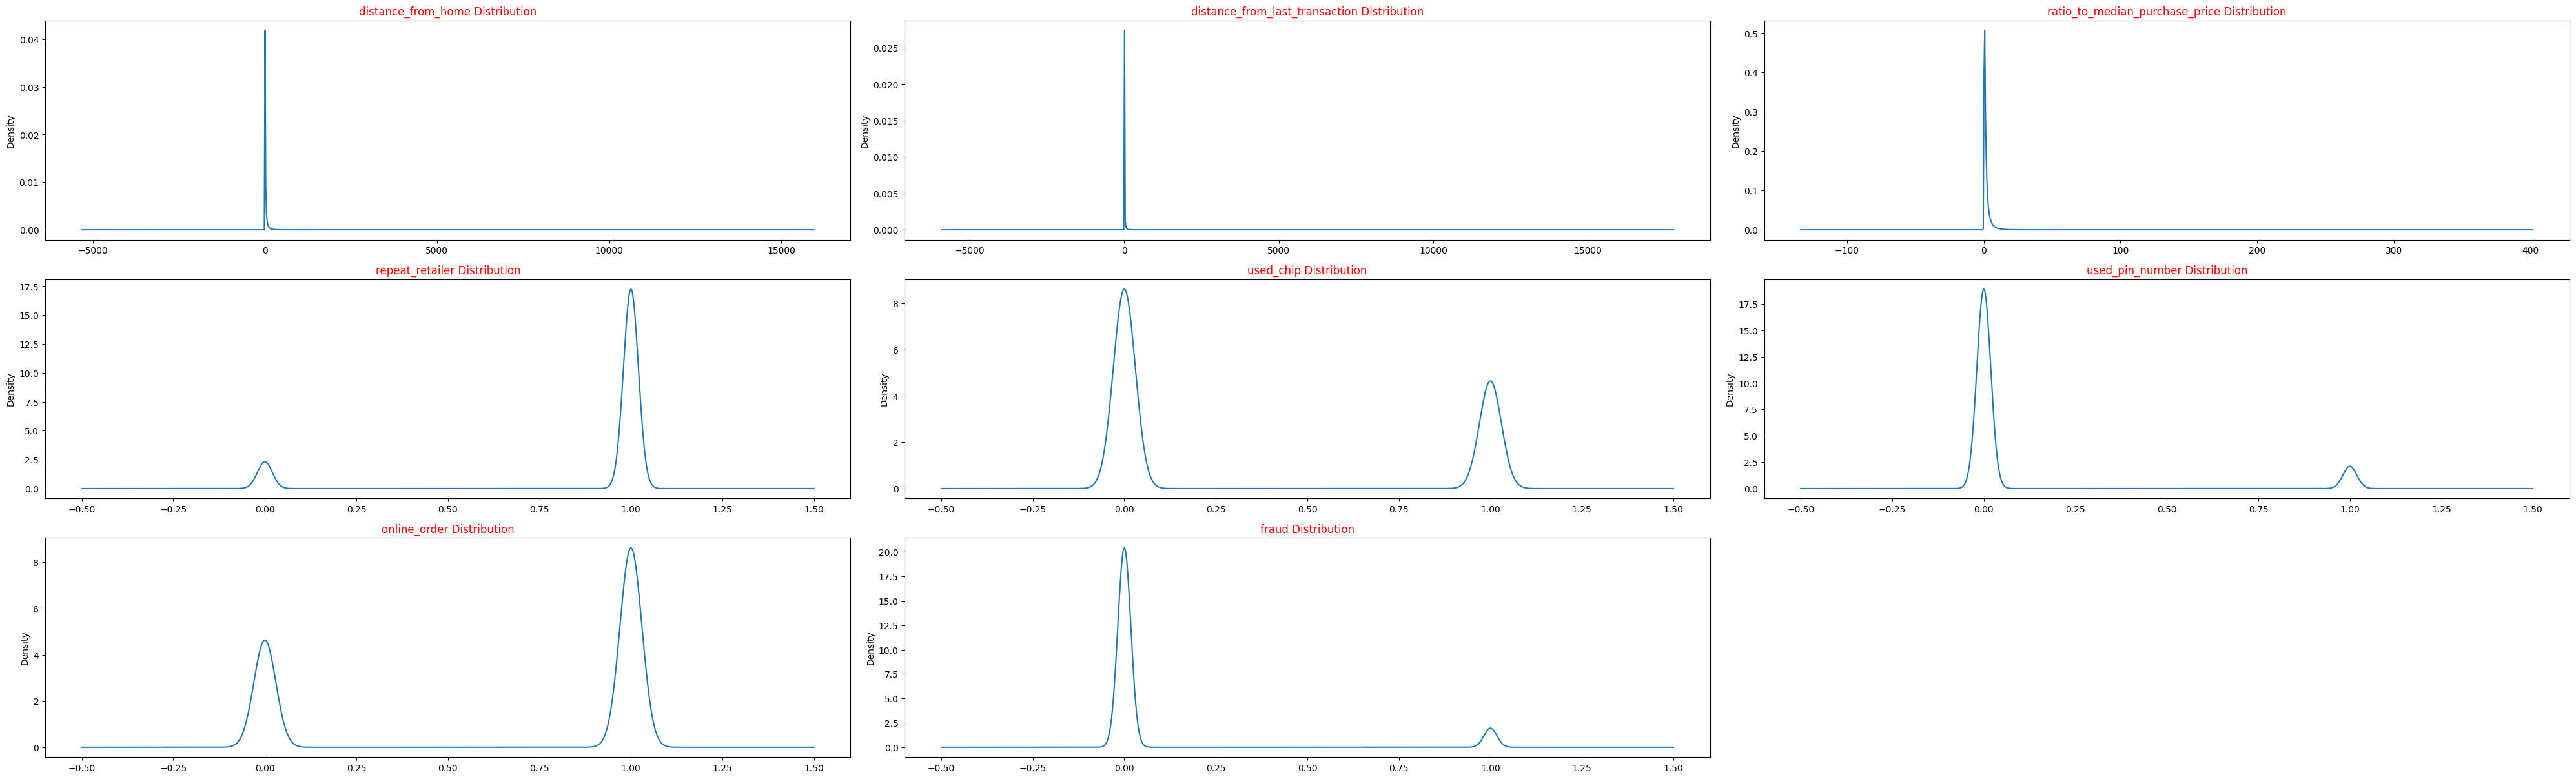

In [19]:
fig=plt.figure(figsize=(40,40))
for i, feature in enumerate(df.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    df[feature].plot(ax=ax, kind='kde')
    ax.set_title(feature+" Distribution",color='red')

fig.tight_layout()  
plt.show()

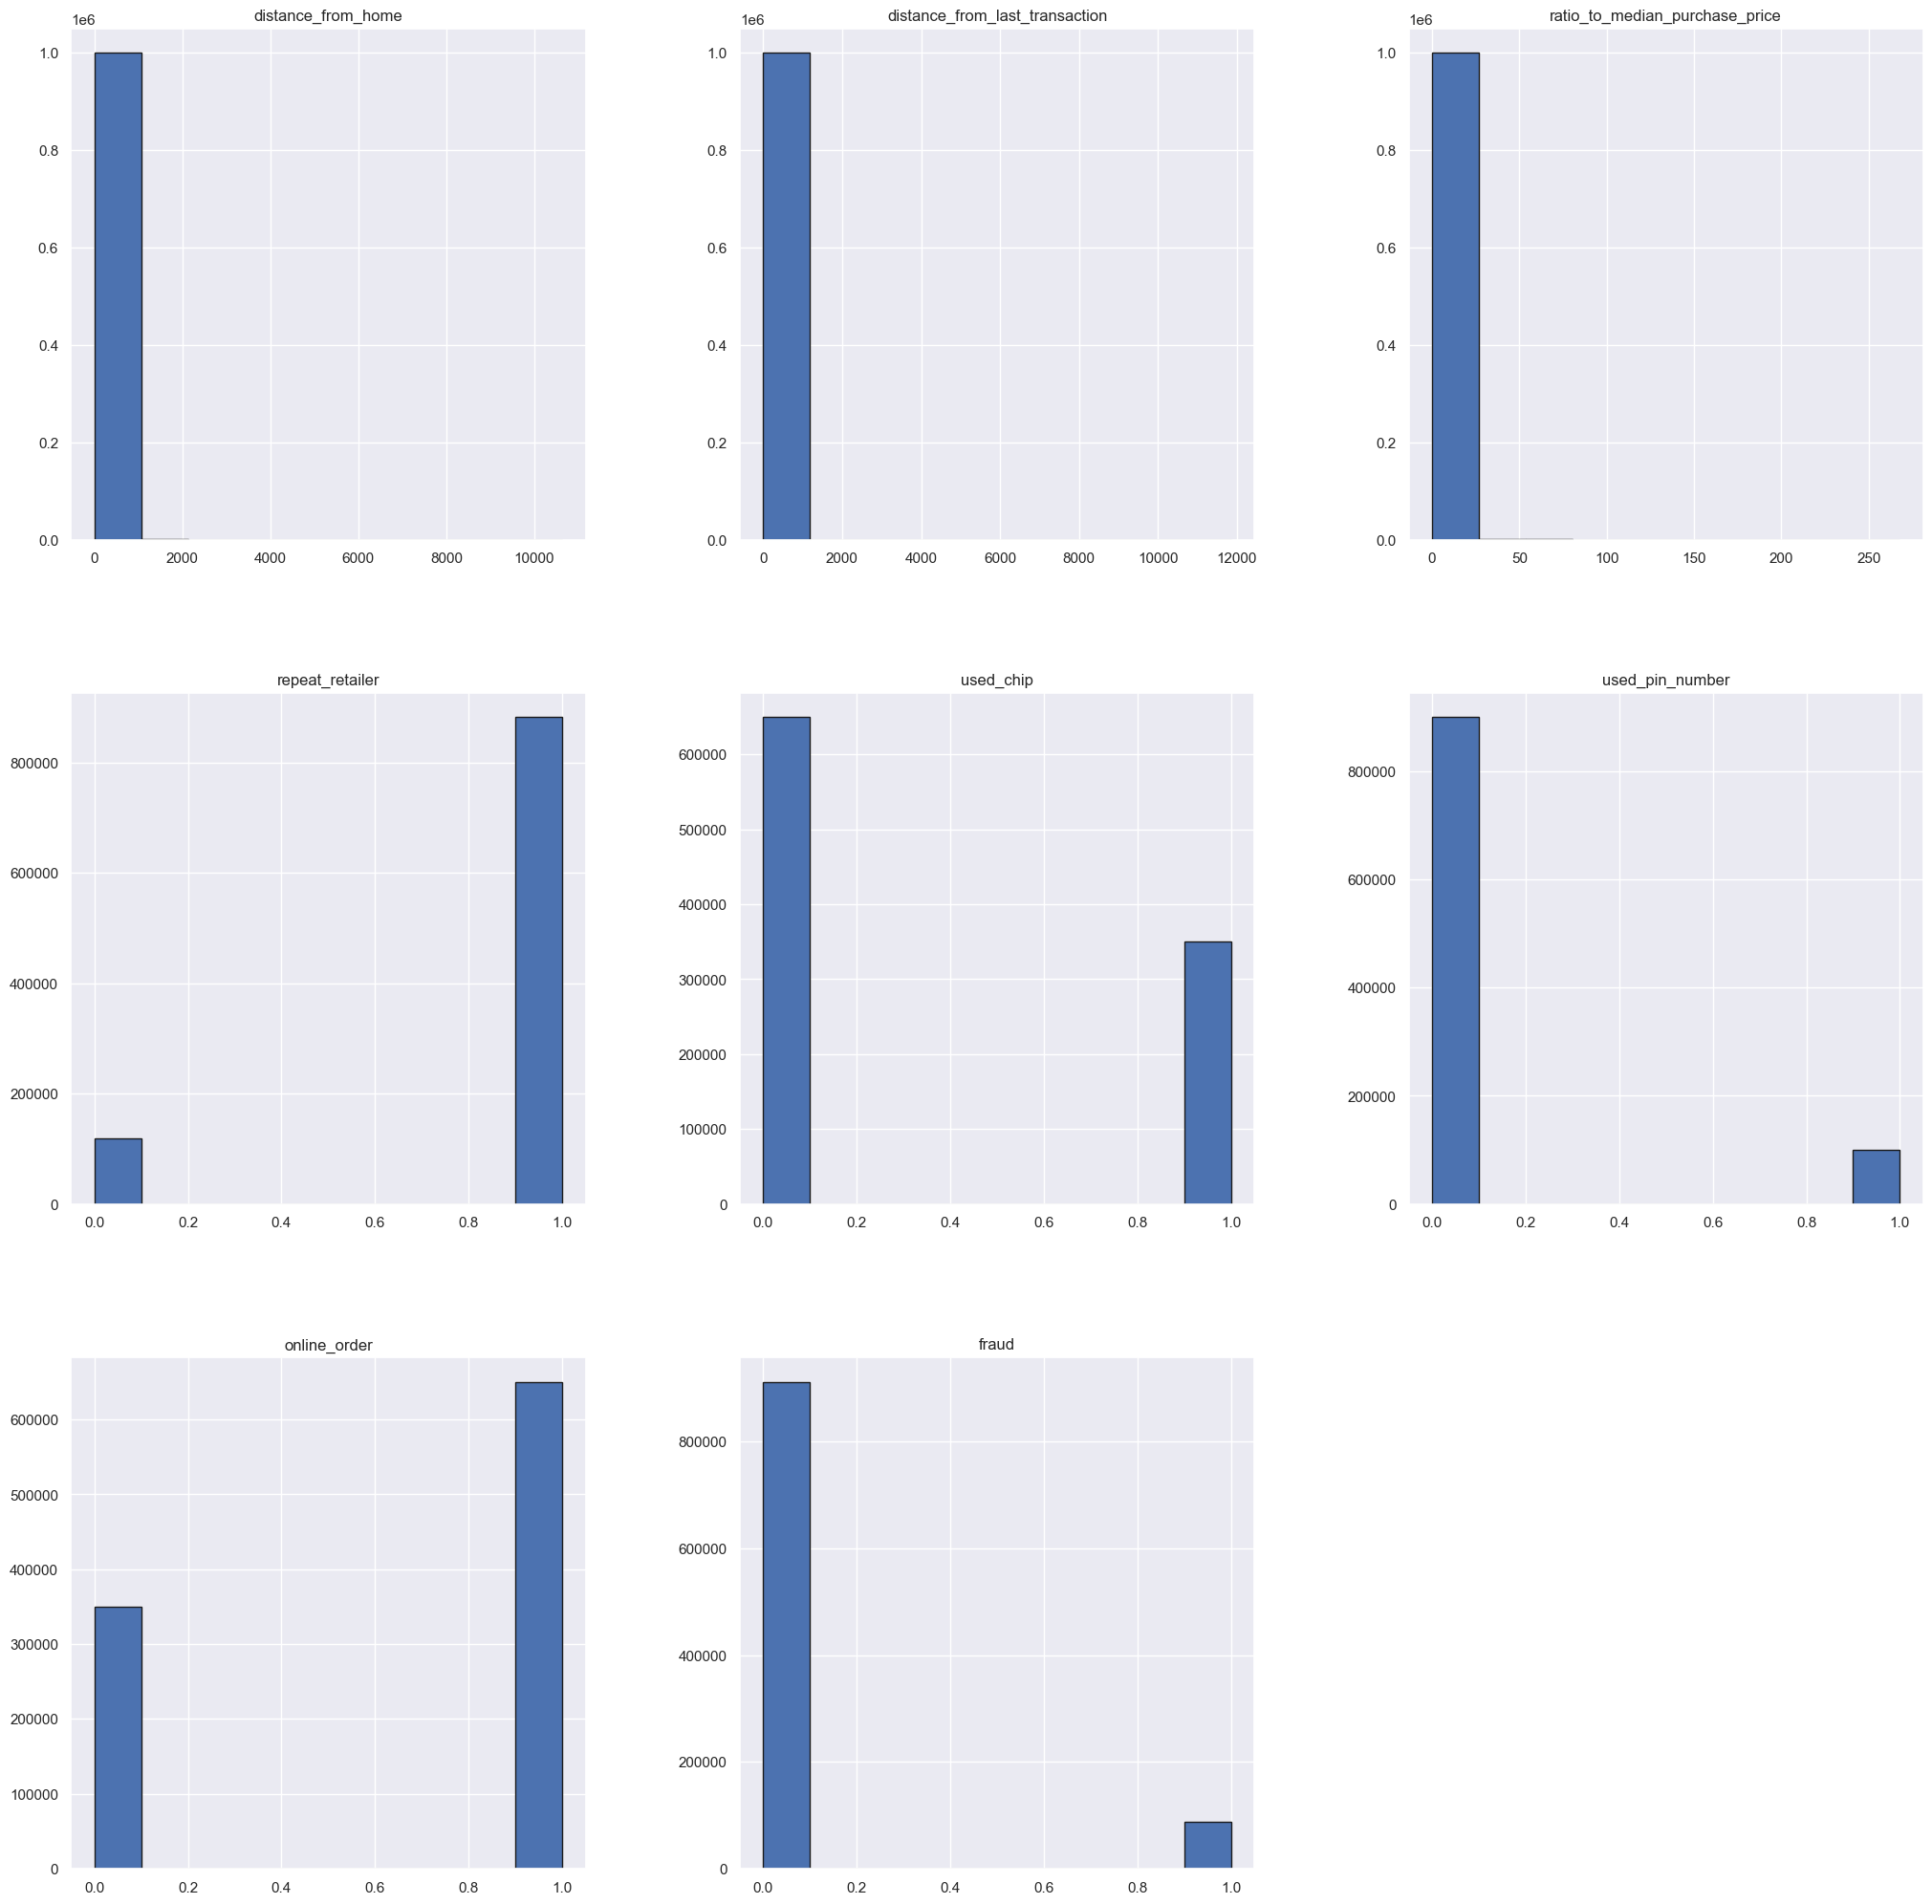

In [60]:
df.select_dtypes('float').hist(figsize=(25,25), ec='k')
plt.show()


In [20]:
## Get the Frad and normal total 
normal = df[df['fraud'] == 0]
fraud = df[df['fraud'] == 1]

In [21]:
print(normal.shape, fraud.shape)

(912597, 8) (87403, 8)


In [49]:
plt.figure(figsize=(20,20))
corr=df.corr().round(1)
fig = px.imshow(corr)
fig.update_layout(
    title_text="Credit Card Fraud"
)
fig.show()

<Figure size 2000x2000 with 0 Axes>

The plot reveals that 'ratio_to_median_purchase_price' has the strongest positive correlation with the target class in our credit card fraud dataset. Additionally, 'online_order' and 'distance_from_home' exhibit the second-highest positive correlation, indicating their potential usefulness in detecting fraudulent transactions.

At the same time, 'used_chip' and 'used_pin_number' both feature negative correlates with the target class, suggesting that their absence may signal a higher likelihood of fraud.

<hr>

<AxesSubplot: >

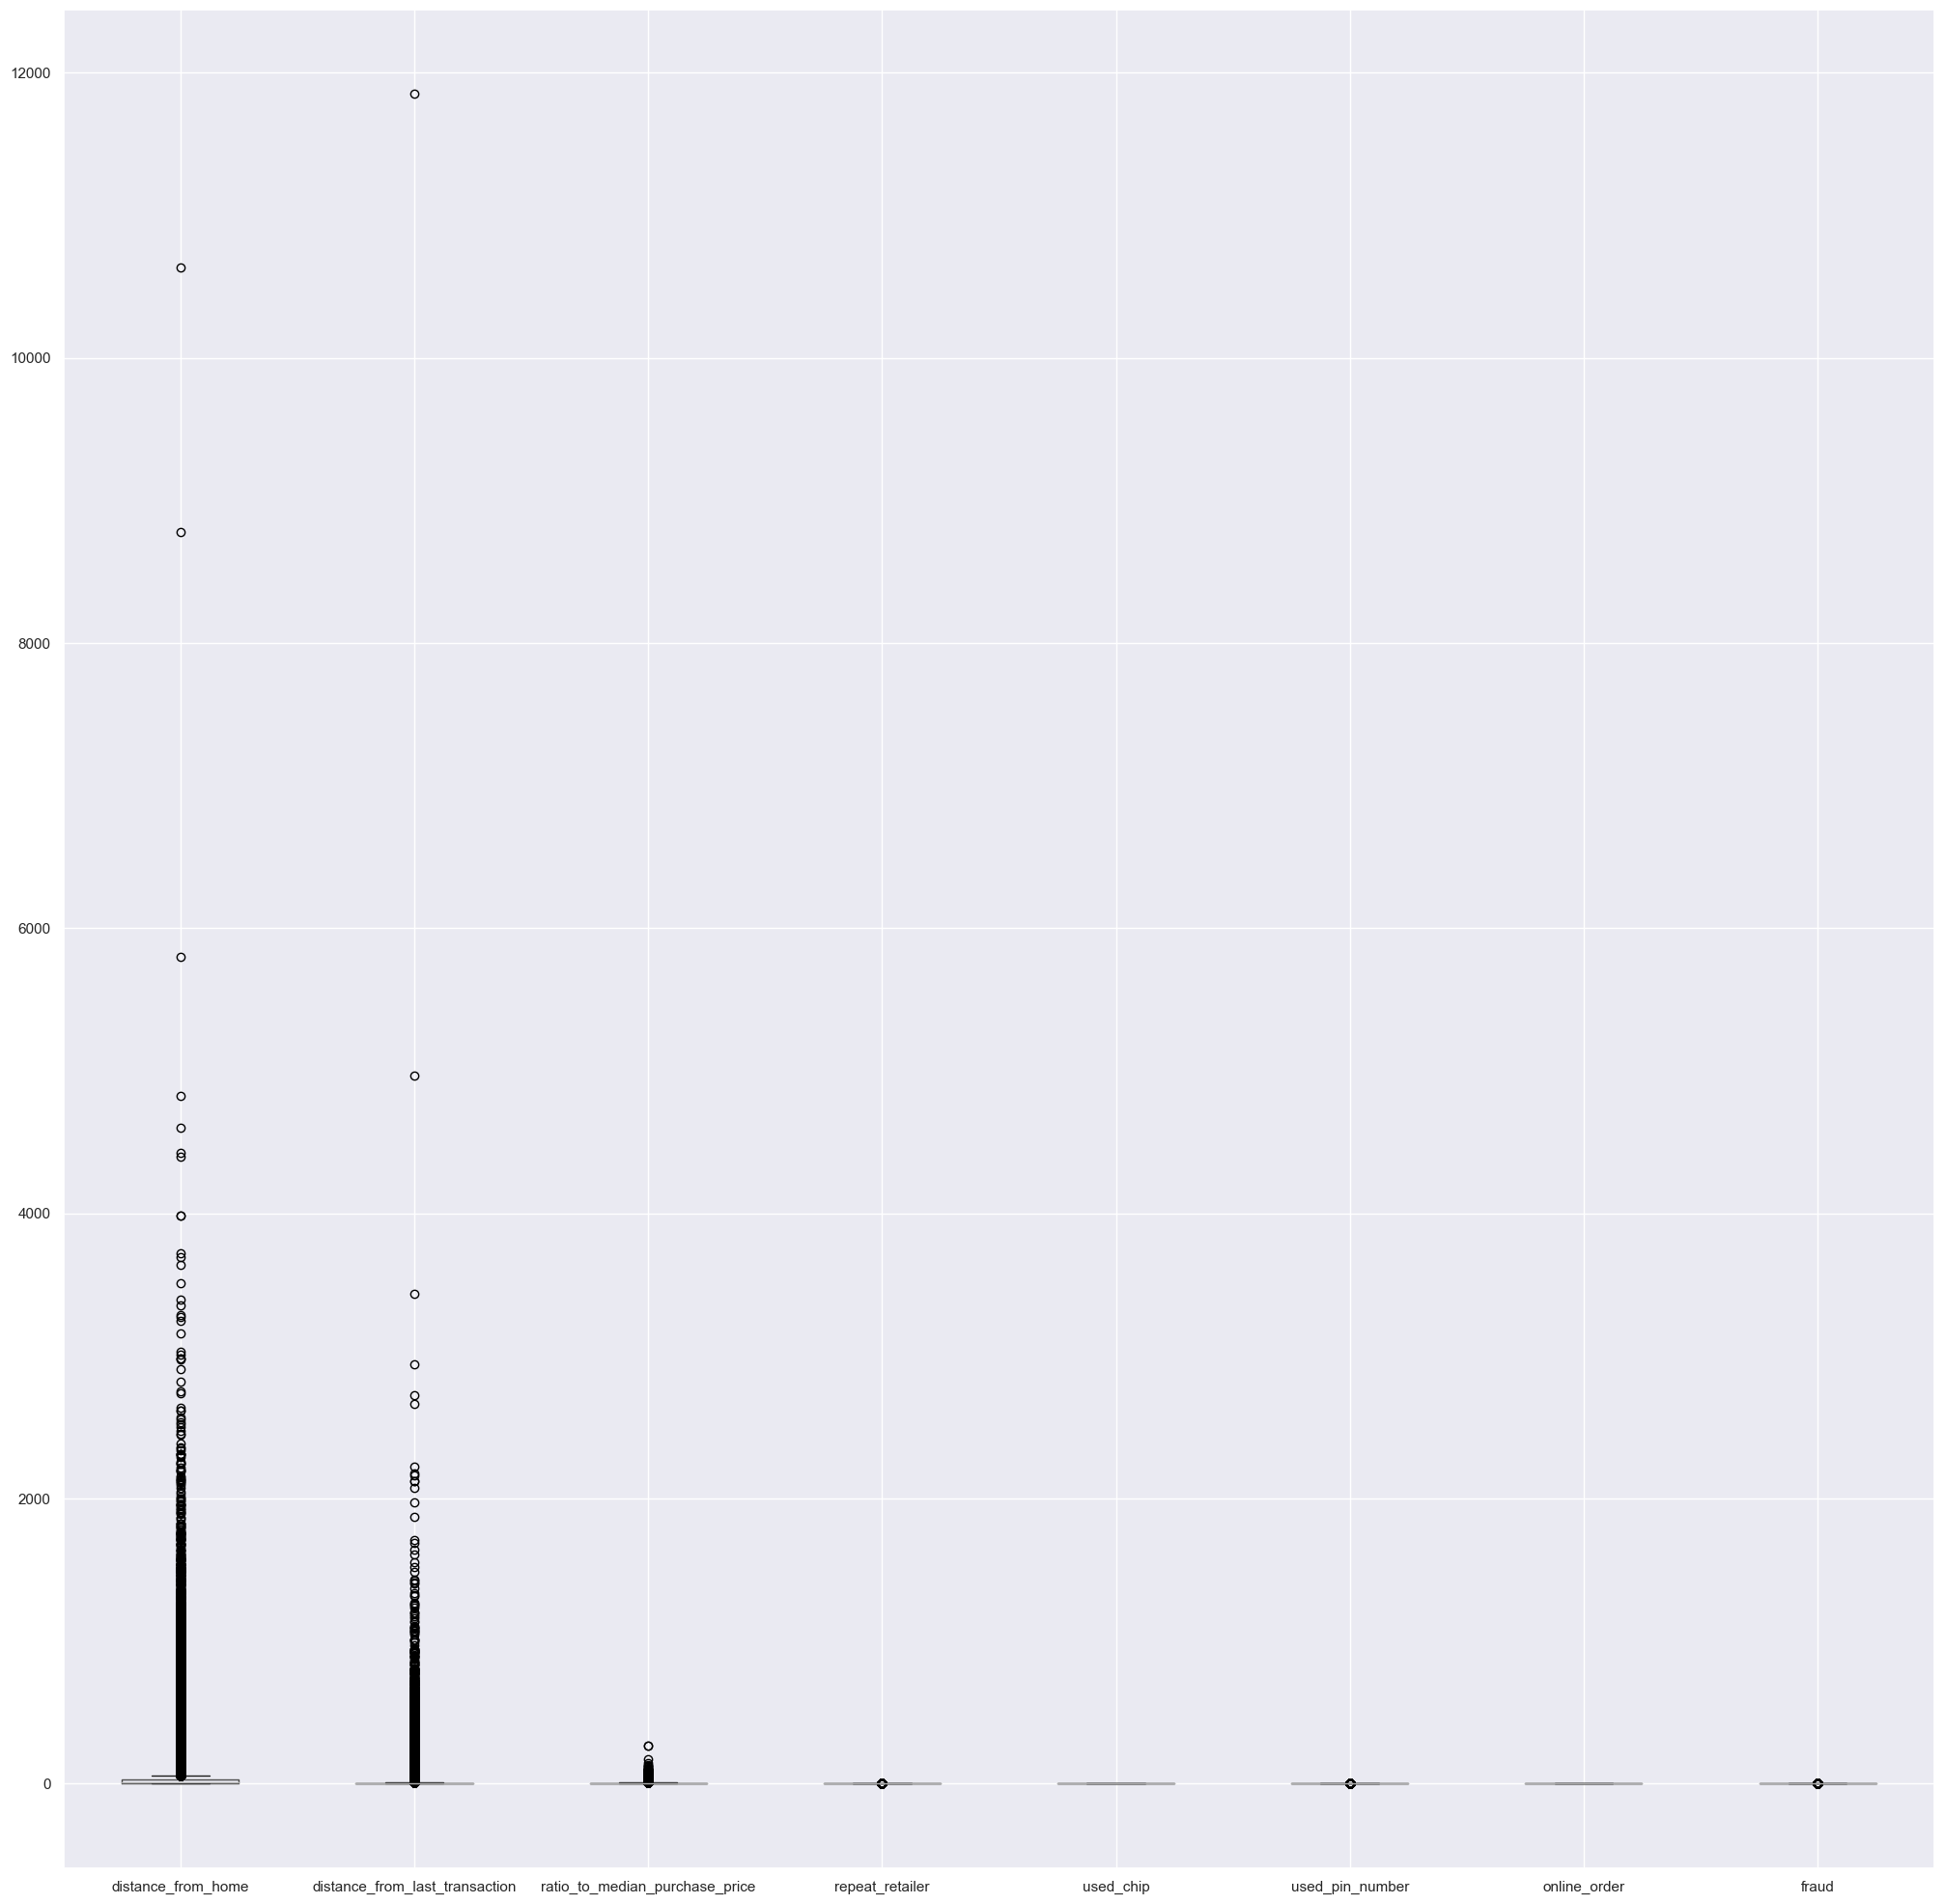

In [61]:
df.select_dtypes('float').boxplot(figsize=(25,25))


In [63]:
def IQR_method (df,n,features):

    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
    
    return multiple_outliers

In [64]:
Outliers_IQR = IQR_method(df,1,columns)
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 87403


In [66]:
print ('The amount of frauds in df before dropping outliers: ', len(df[df['fraud'] == 1]))
print ('The amount of frauds in df after dropping outliers: ', len(df_out[df_out['fraud'] == 1]))

The amount of frauds in df before dropping outliers:  87403
The amount of frauds in df after dropping outliers:  7554


By dropping the outliers, there will only be 8% of the data remaining! By this case we won't be dropping any outliers .

<Figure size 1000x1000 with 0 Axes>

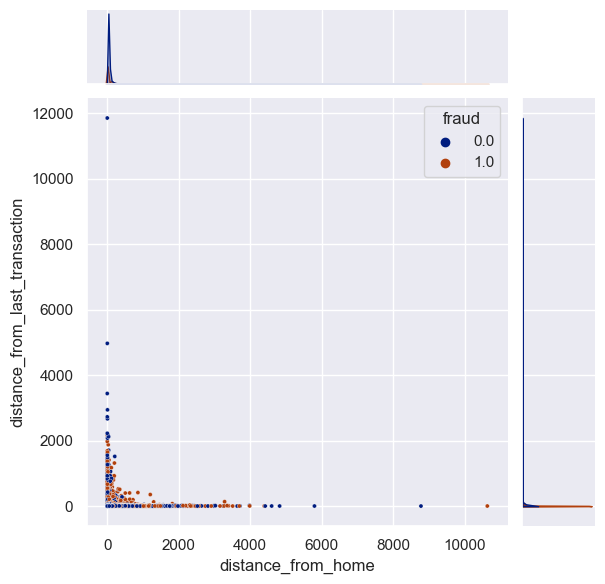

In [67]:
plt.figure(figsize=(10,10))
sns.jointplot(x='distance_from_home', y='distance_from_last_transaction',hue='fraud', data=df, palette='dark', s=9)


In [68]:
from pycaret.classification import *

In [69]:
## take some sample of the date
card_df = df.sample(frac=0.1, random_state=42)
card_df.shape

(100000, 8)

In [70]:
normal = card_df[card_df['fraud'] == 0]
fraud = card_df[card_df['fraud'] == 1]

In [71]:
exp1 = setup(data=card_df, target='fraud', session_id=123, use_gpu=True, fix_imbalance = True, fix_imbalance_method=TomekLinks())

,Description,Value
0,Session id,123
1,Target,fraud
2,Target type,Binary
3,Original data shape,"(100000, 8)"
4,Transformed data shape,"(99544, 8)"
5,Transformed train set shape,"(69544, 8)"
6,Transformed test set shape,"(30000, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


In [72]:
exp1.models()

[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] GPU Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_GPU=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [73]:
top3 = compare_models(
    turbo=False,
    n_select=3, 
    sort='AUC',
    exclude=['rbfsvm', 'gpc', 'mlp']
    )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9998,1.0000,0.9984,0.9998,0.9991,0.9990,0.9990,0.9450
et,Extra Trees Classifier,0.9980,1.0000,0.9826,0.9945,0.9885,0.9874,0.9875,0.5920
lightgbm,Light Gradient Boosting Machine,0.9978,1.0000,0.9879,0.9874,0.9876,0.9864,0.9864,2.4390
ada,Ada Boost Classifier,0.9998,0.9999,0.9980,0.9992,0.9986,0.9985,0.9985,1.9430
gbc,Gradient Boosting Classifier,0.9995,0.9999,0.9959,0.9987,0.9973,0.9970,0.9970,6.8180
dt,Decision Tree Classifier,0.9997,0.9990,0.9982,0.9985,0.9984,0.9982,0.9982,0.1350
knn,K Neighbors Classifier,0.9620,0.9783,0.8250,0.7595,0.7908,0.7700,0.7708,0.8010
lda,Linear Discriminant Analysis,0.9376,0.9710,0.4156,0.7579,0.5366,0.5062,0.5327,0.1720
lr,Logistic Regression,0.9601,0.9706,0.6307,0.8768,0.7335,0.7126,0.7240,0.4680
qda,Quadratic Discriminant Analysis,0.9512,0.9659,0.6310,0.7669,0.6921,0.6659,0.6697,0.1340


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9999,1.0000,1.0000,0.9984,0.9992,0.9991,0.9991
1,0.9999,1.0000,0.9984,1.0000,0.9992,0.9991,0.9991
2,0.9999,1.0000,0.9984,1.0000,0.9992,0.9991,0.9991
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9999,1.0000,0.9984,1.0000,0.9992,0.9991,0.9991
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9999,1.0000,0.9984,1.0000,0.9992,0.9991,0.9991
8,0.9991,1.0000,0.9902,1.0000,0.9951,0.9946,0.9946


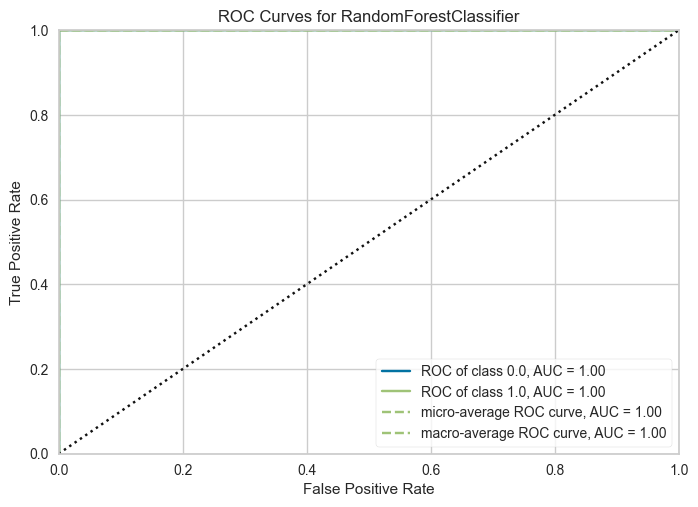

In [74]:
rf = exp1.create_model('rf')
plot_model(rf)

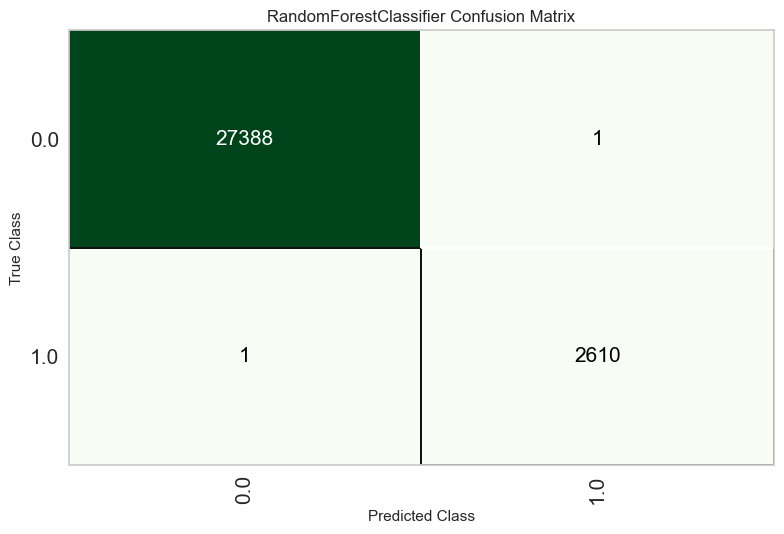

In [75]:
plot_model(rf, plot='confusion_matrix')